**Nama Anggota Kelompok:**

1. Alya Marliza Koesnanto - 04 / 2141720004
2. Prasasty Dara D. S. - 23 / 2141720263

# **Tugas**

* Lakukan klasifikasi pada data MNIST dengan menggunakan model ANN
* Anda diperbolehkan melakukan eksplorasi terhadap,
    * Metode pra pengolahan
    * Pemilihan fitur
    * Arsitektur ANN
    * Fungsi Aktiviasi
* ANN diimplementasikan dengan menggunakan tensorflow.
* **DIKERJAKAN SECARA BERKELOMPOK**
* **JELASKAN HASIL YANG ANDA DAPATKAN,**
    * **AKURASI**
    * **CONFUSION MATRIX**
    * **KONFIGURASI MODEL --> MULAI DARI PRA PENGOLAHAN SAMPAI ARSITEKTUR ANN**

# **Jawaban**

### **Pra-pengolahan Data**

* Import Library dan Data terlebih dahulu

In [9]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# Impor dataset MNIST dari TensorFlow
mnist = keras.datasets.mnist

# Memisahkan dataset menjadi data latih dan data uji
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalisasi data
train_images, test_images = train_images / 255.0, test_images / 255.0

* Tahapan pra-pengolahan data dengan arsitektur ANN

In [10]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Input layer
    keras.layers.Dense(128, activation='relu'),  # Hidden layer
    keras.layers.Dropout(0.2),  # Dropout layer
    keras.layers.Dense(10, activation='softmax')  # Output layer
])

* Beberapa kompilasi contoh dari dataset MNIST

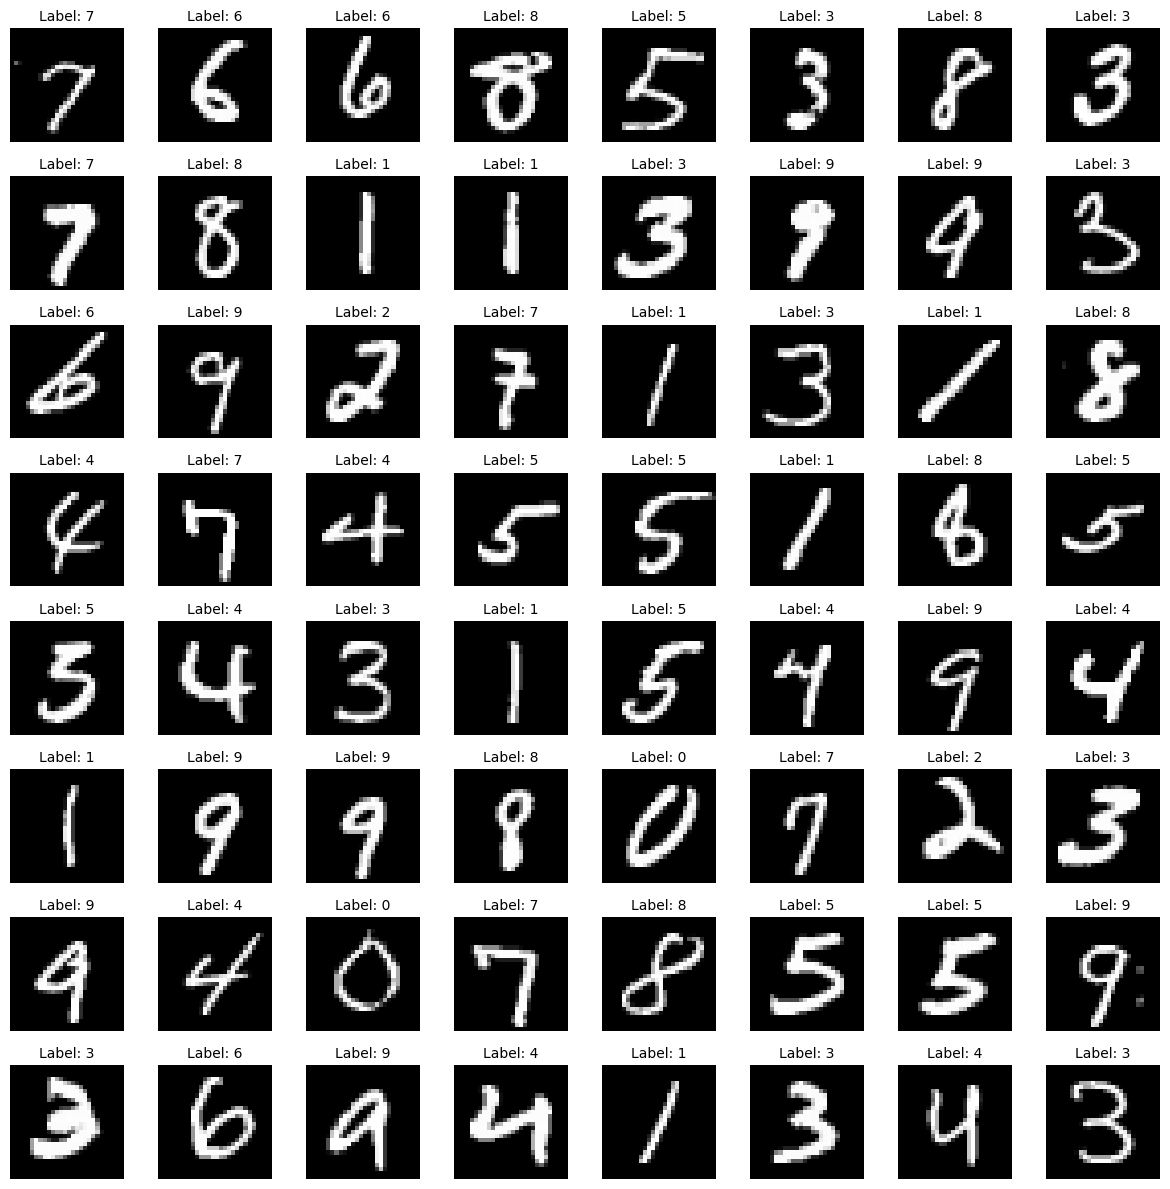

In [11]:
import matplotlib.pyplot as plt

num_images = 64  

# Memilih contoh gambar secara acak dari data latih
random_indices = np.random.choice(len(train_images), num_images, replace=False)
sample_images = train_images[random_indices]
sample_labels = train_labels[random_indices]

# Menghitung jumlah baris dan kolom berdasarkan akar kuadrat dari num_images
grid_size = int(np.ceil(np.sqrt(num_images)))

# Menampilkan gambar dalam grid
fig, axes = plt.subplots(grid_size, grid_size, figsize=(12, 12))
for i, ax in enumerate(axes.flat):
    if i < num_images:
        ax.imshow(sample_images[i], cmap='gray')
        ax.set_title(f"Label: {sample_labels[i]}", fontsize=10)
        ax.axis('off')

plt.tight_layout()
plt.show()


* Kompilasi Model

In [12]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

* Pelatihan model

In [13]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2920 - accuracy: 0.9144
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1407 - accuracy: 0.9587
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1054 - accuracy: 0.9682
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0859 - accuracy: 0.9733
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0735 - accuracy: 0.9768
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0641 - accuracy: 0.9797
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0567 - accuracy: 0.9815
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0520 - accuracy: 0.9834
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0458 - accuracy: 0.9854
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.042

* Evaluasi pada data uji

In [14]:
# Evaluasi model pada data uji
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Akurasi pada data pelatihan: {test_acc:.2f}')

# Prediksi data uji
predictions = model.predict(test_images)

# Konversi hasil prediksi menjadi label
predicted_labels = [tf.argmax(prediction).numpy() for prediction in predictions]


313/313 [==============================] - 1s 2ms/step - loss: 0.0674 - accuracy: 0.9793
Akurasi pada data pelatihan: 0.98
313/313 [==============================] - 1s 2ms/step


* Confusion Matrix

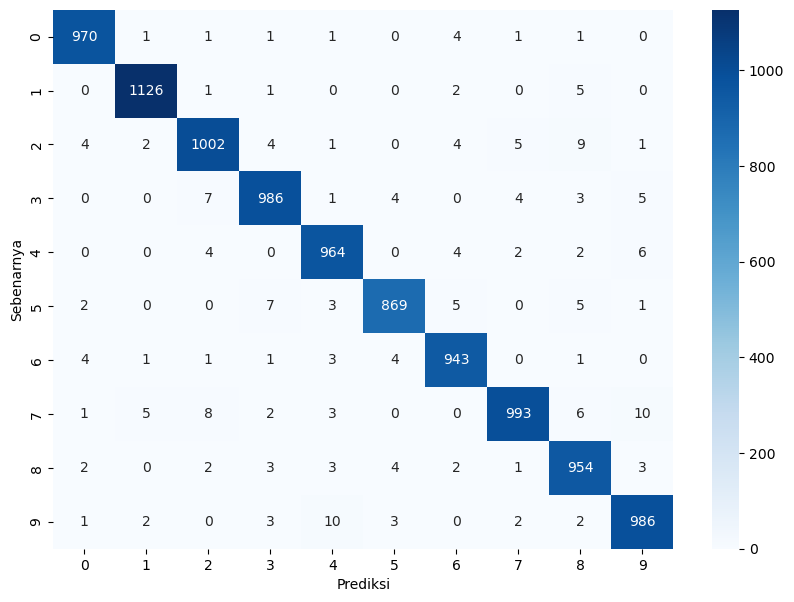

In [15]:
# Membuat confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(test_labels, predicted_labels)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prediksi')
plt.ylabel('Sebenarnya')
plt.show()